# as it would be in a script

In [ ]:
import pandas as pd
from mcda.utility_functions.aggregation import Aggregation

In [ ]:
d = {'col1': [1, 2, 3], 'col3': [100, 200, 300]}
data = pd.DataFrame(data=d)
data

In [ ]:
import multiprocessing as mp
print("Number of processors: ", mp.cpu_count())

In [ ]:
def initialize_and_call_aggregation(args):
    weights,data = args
    agg = Aggregation(weights)
    res = agg.minmax(data)
    print(res)

if __name__ == '__main__':
    
    args = [([1,1],data),([2,2],data),([3,3],data)]
    
    # Step 1: Init multiprocessing.Pool()
    pool = mp.Pool(processes = len(args)) #mp.cpu_count())
    
    # Step 2:
    pool.map(initialize_and_call_aggregation, args)
    
    # Step 3: Don't forget to close
    pool.close() 
    pool.join()

# as it should be in a notebook

## with multiprocessing

In [2]:
import pandas as pd
import initialize_and_call_aggregation
import multiprocess as mp
from mcda.utility_functions.aggregation import Aggregation

In [3]:
d = {'col1': [1, 2, 3], 'col3': [100, 200, 300]}
data = pd.DataFrame(data=d)
data

,col1,col3
0,1,100
1,2,200
2,3,300


In [5]:
data.to_numpy()

array([[  1, 100],
       [  2, 200],
       [  3, 300]])

In [17]:
def initialize_and_call_aggregation(args):
    weights,data = args
    agg = Aggregation(weights)
    res = agg.weighted_sum(data)
    print(res)

In [18]:
args = [([1,1],data),([2,2],data),([3,3],data)]

In [19]:
processes = []
for arg in args:
    process = mp.Process(target=initialize_and_call_aggregation, args=(arg,))
    process.start()
    processes.append(process)

0    101
1    202
2    303
dtype: int64
0    202
1    404
2    606
dtype: int64
0    303
1    606
2    909
dtype: int64


In [ ]:
# Wait for all processes to complete
for process in processes:
    process.join()

## with joblib

In [1]:
import pandas as pd
from joblib import Parallel, delayed
#import initialize_and_call_aggregation
from mcda.utility_functions.aggregation import Aggregation

In [10]:
def initialize_and_call_aggregation(args):
    weights,data = args
    agg = Aggregation(weights)
    res = agg.weighted_sum(data)
    print(res)

In [11]:
d = {'col1': [1, 2, 3], 'col3': [100, 200, 300]}
data = pd.DataFrame(data=d)
data

,col1,col3
0,1,100
1,2,200
2,3,300


In [12]:
args = [([1,1],data),([2,2],data),([3,3],data)]

In [13]:
Parallel(n_jobs=-1)(delayed(initialize_and_call_aggregation)(arg) for arg in args)

[None, None, None]

In [20]:
agg = Aggregation(weights=[3,3])

In [21]:
agg.weighted_sum(data)

0    303
1    606
2    909
dtype: int64

0    101
1    202
2    303
dtype: int64
0    303
1    606
2    909
dtype: int64
0    202
1    404
2    606
dtype: int64


In [22]:
1/0.1

10.0

In [23]:
import random

N = 5  # Number of lists

# Generate N lists
lists = []
for _ in range(N):
    # Randomly sample 3 elements from a uniform distribution
    lst = [random.uniform(0, 1) for _ in range(3)]
    lists.append(lst)

# Print the generated lists
for lst in lists:
    print(lst)

[0.8664353380059346, 0.8885952970628875, 0.16110189250386908]
[0.817867752043302, 0.03755831894555339, 0.5651176996425261]
[0.9355917434714581, 0.07236601321133973, 0.8126406911295598]
[0.43356387369326843, 0.6126392040864822, 0.40074607134050944]
[0.4949286450750924, 0.7901006750909714, 0.07910261826416232]


In [25]:
for w in lists:
    print(w)

[0.8664353380059346, 0.8885952970628875, 0.16110189250386908]
[0.817867752043302, 0.03755831894555339, 0.5651176996425261]
[0.9355917434714581, 0.07236601321133973, 0.8126406911295598]
[0.43356387369326843, 0.6126392040864822, 0.40074607134050944]
[0.4949286450750924, 0.7901006750909714, 0.07910261826416232]


In [26]:
0.05798507045273814+0.24361581472567181+0.073686399882017+0.26290890714486176+0.12280964453060948+0.20186305922826037+0.003201135320640069+0.033929968715201445




1.0000000000000002

In [27]:
###

In [29]:
d1 = {'col1': [1, 2, 3], 'col2': [100, 200, 300]}
data1 = pd.DataFrame(data=d1)
data1

d2 = {'col1': [11, 22, 33], 'col2': [110, 220, 330]}
data2 = pd.DataFrame(data=d2)
data2

d3 = {'col1': [111, 222, 333], 'col2': [111, 222, 333]}
data3 = pd.DataFrame(data=d3)
data3

list = [data1, data2, data3]

In [32]:
all_runs = pd.concat(list, axis=0)

In [33]:
all_runs

,col1,col2
0,1,100
1,2,200
2,3,300
0,11,110
1,22,220
2,33,330
0,111,111
1,222,222
2,333,333


In [39]:
by_row_index = all_runs.groupby(all_runs.index)
df_means = by_row_index.mean()
df_stds = by_row_index.std()

In [38]:
df_means

,col1,col2
0,41.0,107.0
1,82.0,214.0
2,123.0,321.0


In [40]:
df_stds

,col1,col2
0,60.827625,6.082763
1,121.655251,12.165525
2,182.482876,18.248288


In [41]:
scores = pd.DataFrame()

In [42]:
scores

""


In [43]:
scores_ehi = df_stds

In [47]:
if not scores.empty: 
    print('ehi')
elif not scores_ehi.empty:
    print('ciao')
    

ciao


In [48]:
num_of_combinations = scores.shape[1]-1
fig = go.Figure(layout_yaxis_title="MCDA rough score")
i = 0
while i <= num_of_combinations - 1:
    fig.add_trace(go.Bar(
    name=scores.columns[i+1],
    x=scores['Alternatives'][:].values.tolist(),
    y=scores.iloc[:, i + 1],
        ))
    i = i + 1
    fig.update_layout(barmode='group', height=600, width=1000,
                      title='<b>MCDA analysis<b>',
                      title_font_size=22,

                      xaxis=dict(
                          tickmode="array",
                          tickvals=np.arange(0, len(scores['Alternatives'][:])),
                          ticktext=scores['Alternatives'][:],
                          tickangle=45)
                      )
fig.show()

NameError: name 'go' is not defined

In [11]:
import random
random.uniform(0, 1)

0.45870015694918254

In [24]:
list_of_weights = []
for _ in range(3):
    lst = [1] * 5
    lst[0] = random.uniform(0, 1)
    print(lst)
    list_of_weights.append(lst)
print(list_of_weights)

[0.22321073814882275, 1, 1, 1, 1]
[0.7364712141640124, 1, 1, 1, 1]
[0.6766994874229113, 1, 1, 1, 1]
[[0.22321073814882275, 1, 1, 1, 1], [0.7364712141640124, 1, 1, 1, 1], [0.6766994874229113, 1, 1, 1, 1]]


In [18]:
test = []
vector = [321]
test.append(vector)
print(test)

[[321]]


In [19]:
vector2=[678]

In [20]:
test.append(vector2)

In [21]:
print(test)

[[321], [678]]


In [25]:
0.14213463885684058 + 0.14213463885684058 + 0.14213463885684058 + 0.14213463885684058 + 0.14213463885684058 + 0.14213463885684058 + 0.14213463885684058 + 0.00505752800211593

0.9999999999999998

In [26]:
for index in range(4):
    print(index)

0
1
2
3


In [62]:
from PIL import Image

im1 = Image.open("/Users/flaminia/Desktop/MCDA_test_iterative_rand_weights/MCDA_norm_scores_no_var.png")
im2 = Image.open("/Users/flaminia/Desktop/MCDA_test_iterative_rand_weights/MCDA_rough_scores_no_var.png")

DEBUG: 2023-06-13 10:47:11,884 - PIL.PngImagePlugin - STREAM b'IHDR' 16 13
DEBUG: 2023-06-13 10:47:11,885 - PIL.PngImagePlugin - STREAM b'IDAT' 41 8192
DEBUG: 2023-06-13 10:47:11,886 - PIL.PngImagePlugin - STREAM b'IHDR' 16 13
DEBUG: 2023-06-13 10:47:11,887 - PIL.PngImagePlugin - STREAM b'IDAT' 41 8192


In [63]:
type(im1)

PIL.PngImagePlugin.PngImageFile

In [64]:
#images = ["/Users/flaminia/Desktop/MCDA_test_iterative_rand_weights/MCDA_norm_scores_no_var.png","/Users/flaminia/Desktop/MCDA_test_iterative_rand_weights/MCDA_rough_scores_no_var.png"]
images = [im1,im2]

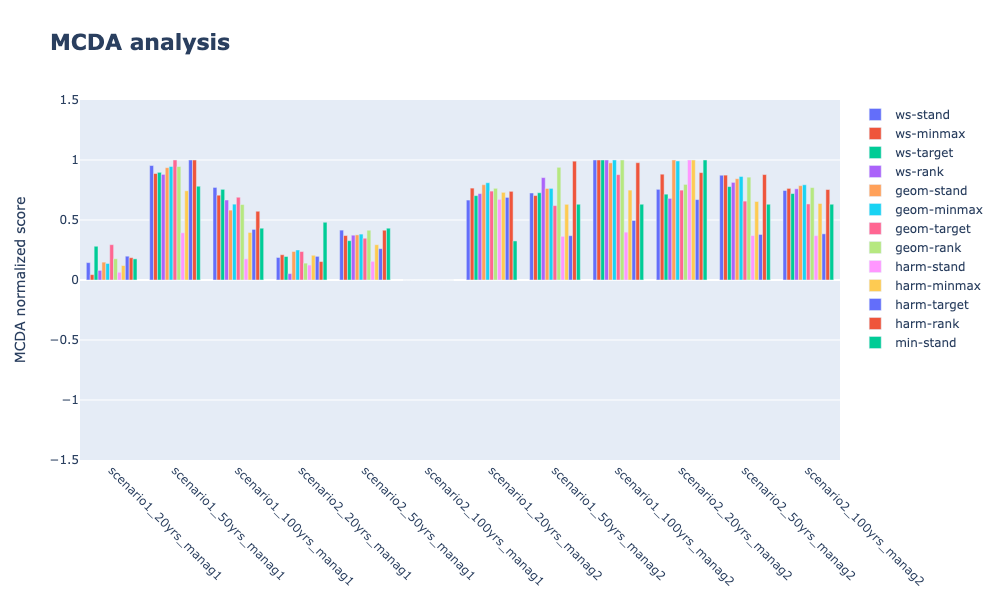

In [65]:
images[0]

In [76]:
for i,j in enumerate(images):
    print(i)
    print(j)

0
<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1000x600 at 0x103E91E50>
1
<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1000x600 at 0x13D7FCE20>


In [77]:
def combine_images(images, output_file):
    # Open the first image
    #first_image = Image.open(images[0])
    first_image =images[0]

    # Determine the size of the final image based on the first image
    width, height = first_image.size

    # Create a new image object with the size of the final image
    combined_image = Image.new("RGB", (width, height * len(images)))

    # Loop through the images and paste them into the combined image
    for i,j in enumerate(images):
        image = j
    
        # Calculate the box dimensions for pasting the image
        box = (0, i * height, width, (i + 1) * height)
        
        # Paste the image into the combined image using the box dimensions
        combined_image.paste(image, box)
        
        # Save the combined image
        combined_image.save(output_file)

# Example usage
combine_images(images, "./test_combine_figures.jpg")


In [52]:
! ls

LICENSE                                mcda
README.md                              parallel.ipynb
__init__.py                            requirements.txt
__pycache__                            testing_score_calculation.ipynb
backup_parallel.ipynb                  testing_various_functionalities.ipynb
configuration_w_uncertainty.json       tests
configuration_without_uncertainty.json venv
initialize_and_call_aggregation.py


In [38]:
type(im1)

PIL.PngImagePlugin.PngImageFile

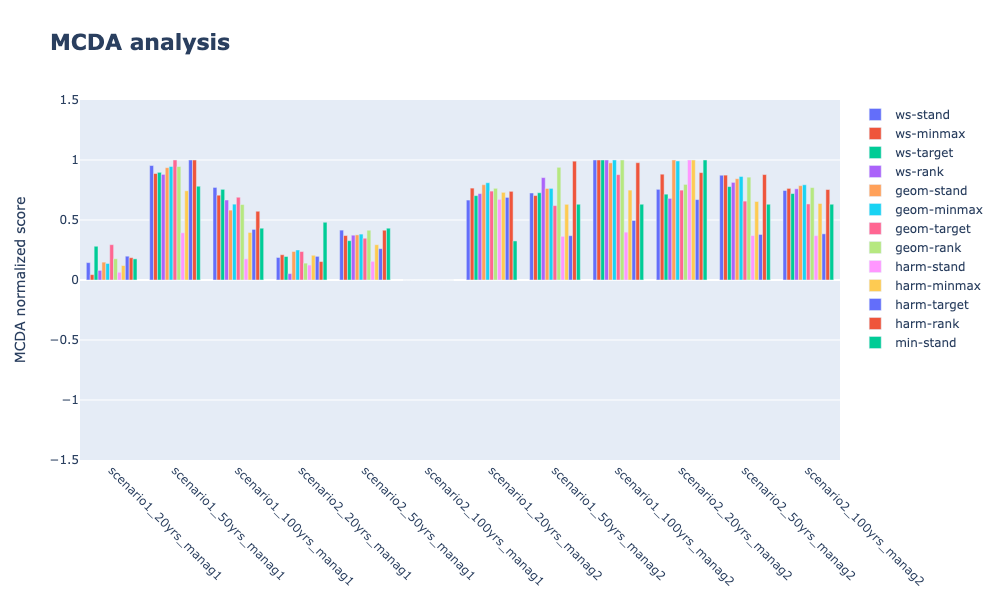

In [37]:
im1

In [78]:
import pickle


with open('/Users/flaminia/Desktop/MCDA_test_iterative_rand_weights/score_means.pkl', 'rb') as f:
    data = pickle.load(f)

In [79]:
data

{'indicator_1':                Alternatives  ws-stand  ws-minmax  ws-target   ws-rank  \
 0    scenario1_20yrs_manag1 -0.718691   0.218911   0.394283  3.914074   
 1    scenario1_50yrs_manag1  0.367639   0.591495   0.615143  7.646145   
 2   scenario1_100yrs_manag1  0.209204   0.533877   0.585301  6.646145   
 3    scenario2_20yrs_manag1 -0.551801   0.325889   0.382480  4.210419   
 4    scenario2_50yrs_manag1 -0.294746   0.380254   0.414940  5.531123   
 5   scenario2_100yrs_manag1 -0.828695   0.225732   0.302615  4.014207   
 6    scenario1_20yrs_manag2  0.085264   0.572963   0.572699  6.985793   
 7    scenario1_50yrs_manag2  0.180752   0.543329   0.583924  7.727335   
 8   scenario1_100yrs_manag2  0.612636   0.690598   0.701240  8.607577   
 9    scenario2_20yrs_manag2  0.247406   0.635927   0.583462  7.143436   
 10   scenario2_50yrs_manag2  0.432431   0.632668   0.610948  7.884979   
 11  scenario2_100yrs_manag2  0.258602   0.584137   0.592050  7.688767   
 
     geom-stand  geom